In [ ]:
import numpy as np 
import pandas as pd 
import os

In [3]:
labels = pd.read_csv('/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images.csv')
labels.head()



,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [4]:
labels['label'].value_counts()

,count
label,
T-Shirt,1011
Longsleeve,699
Pants,692
Shoes,431
Shirt,378
Dress,357
Outwear,312
Shorts,308
Not sure,228


# **Data Preprocessing**

## Import necessary libraries

In [5]:
!pip install keras-preprocessing


In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import plotly.express as px


import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras import Sequential
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model

In [7]:
dataset = '/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_compressed'
print(f"There are {len(os.listdir(dataset))} images in  dataset")

There are 5761 images in  dataset


In [8]:
file_names = os.listdir(dataset)
file_names[:10]

['ce9448ef-6e8b-4ea3-a26e-6725f07ca177.jpg',
 'b9c867a9-6036-4936-bee4-1704de612352.jpg',
 'ca44f511-7557-4eec-b87f-249c427c2697.jpg',
 'd794c5f1-e227-4007-ba34-8192faba5a05.jpg',
 'dae8c9d7-d344-499e-9253-57bb2a777fe5.jpg',
 'd19e46d9-621e-42f3-b989-528cf9cf97b2.jpg',
 'bc13e811-2e4f-43ed-859e-80de2745ed12.jpg',
 'cfe35b59-afce-48aa-a7f8-0618aae955fd.jpg',
 'cc61f831-f33b-48e4-8623-6fde2a170987.jpg',
 'dc5a3af4-733f-4f4c-95e4-7da9b430397d.jpg']

In [9]:
labels = pd.read_csv('/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images.csv')
labels.head()


,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [10]:
labels['image'] = labels['image']+'.jpg'
labels1 = labels[['image', 'label']]

In [11]:
labels1.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,Shoes


In [12]:
labels1['image']

,image
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg
...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103.jpg
5399,befa14be-8140-4faf-8061-1039947e329d.jpg
5400,5379356a-40ee-4890-b416-2336a7d84061.jpg
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg


In [13]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(dataset).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_compressed/c60e486d-10ed-4f64-abab-5bb698c736dd.jpg
/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_compressed/d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg
/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_compressed/784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg
/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_compressed/b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg
/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_compressed/1d0129a1-f29a-4a3f-b103-f651176183eb.jpg
/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_compressed/040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg


In [14]:
corrupted =['b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg', '1d0129a1-f29a-4a3f-b103-f651176183eb.jpg', 'c60e486d-10ed-4f64-abab-5bb698c736dd.jpg',
            'd028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg', '040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg', '784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg']

In [15]:
labels1 = labels1.drop(labels1[labels1['image'].isin(corrupted)].index, axis=0)

In [16]:
fig = px.bar(labels1['label'].value_counts())
fig.show()


In [17]:
classes = list(labels1['label'].unique())
print(len(classes))
classes

20


['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Skip',
 'Blazer']

In [18]:
class_dict = dict(zip(classes, range(len(classes))))
class_dict

{'Not sure': 0,
 'T-Shirt': 1,
 'Shoes': 2,
 'Shorts': 3,
 'Shirt': 4,
 'Pants': 5,
 'Skirt': 6,
 'Other': 7,
 'Top': 8,
 'Outwear': 9,
 'Dress': 10,
 'Body': 11,
 'Longsleeve': 12,
 'Undershirt': 13,
 'Hat': 14,
 'Polo': 15,
 'Blouse': 16,
 'Hoodie': 17,
 'Skip': 18,
 'Blazer': 19}

In [19]:
labels_to_remove = ['Skip', 'Not sure', 'Other']

In [20]:
labels1 = labels1[~labels1['label'].isin(labels_to_remove)]

In [21]:
fig = px.bar(labels1['label'].value_counts())
fig.show()

In [22]:
y_train = labels1['label']
y_train.shape

(5096,)

In [23]:
def show_random_training_image():
    random_index = random.choice(labels1.index)
    img_path = labels1['image'][random_index]
    label = labels1['label'][random_index]
    complete_path = dataset + '/' + img_path
    image = mpimg.imread(complete_path)
    plt.imshow(image)
    # plt.axis('off')
    plt.title(label)


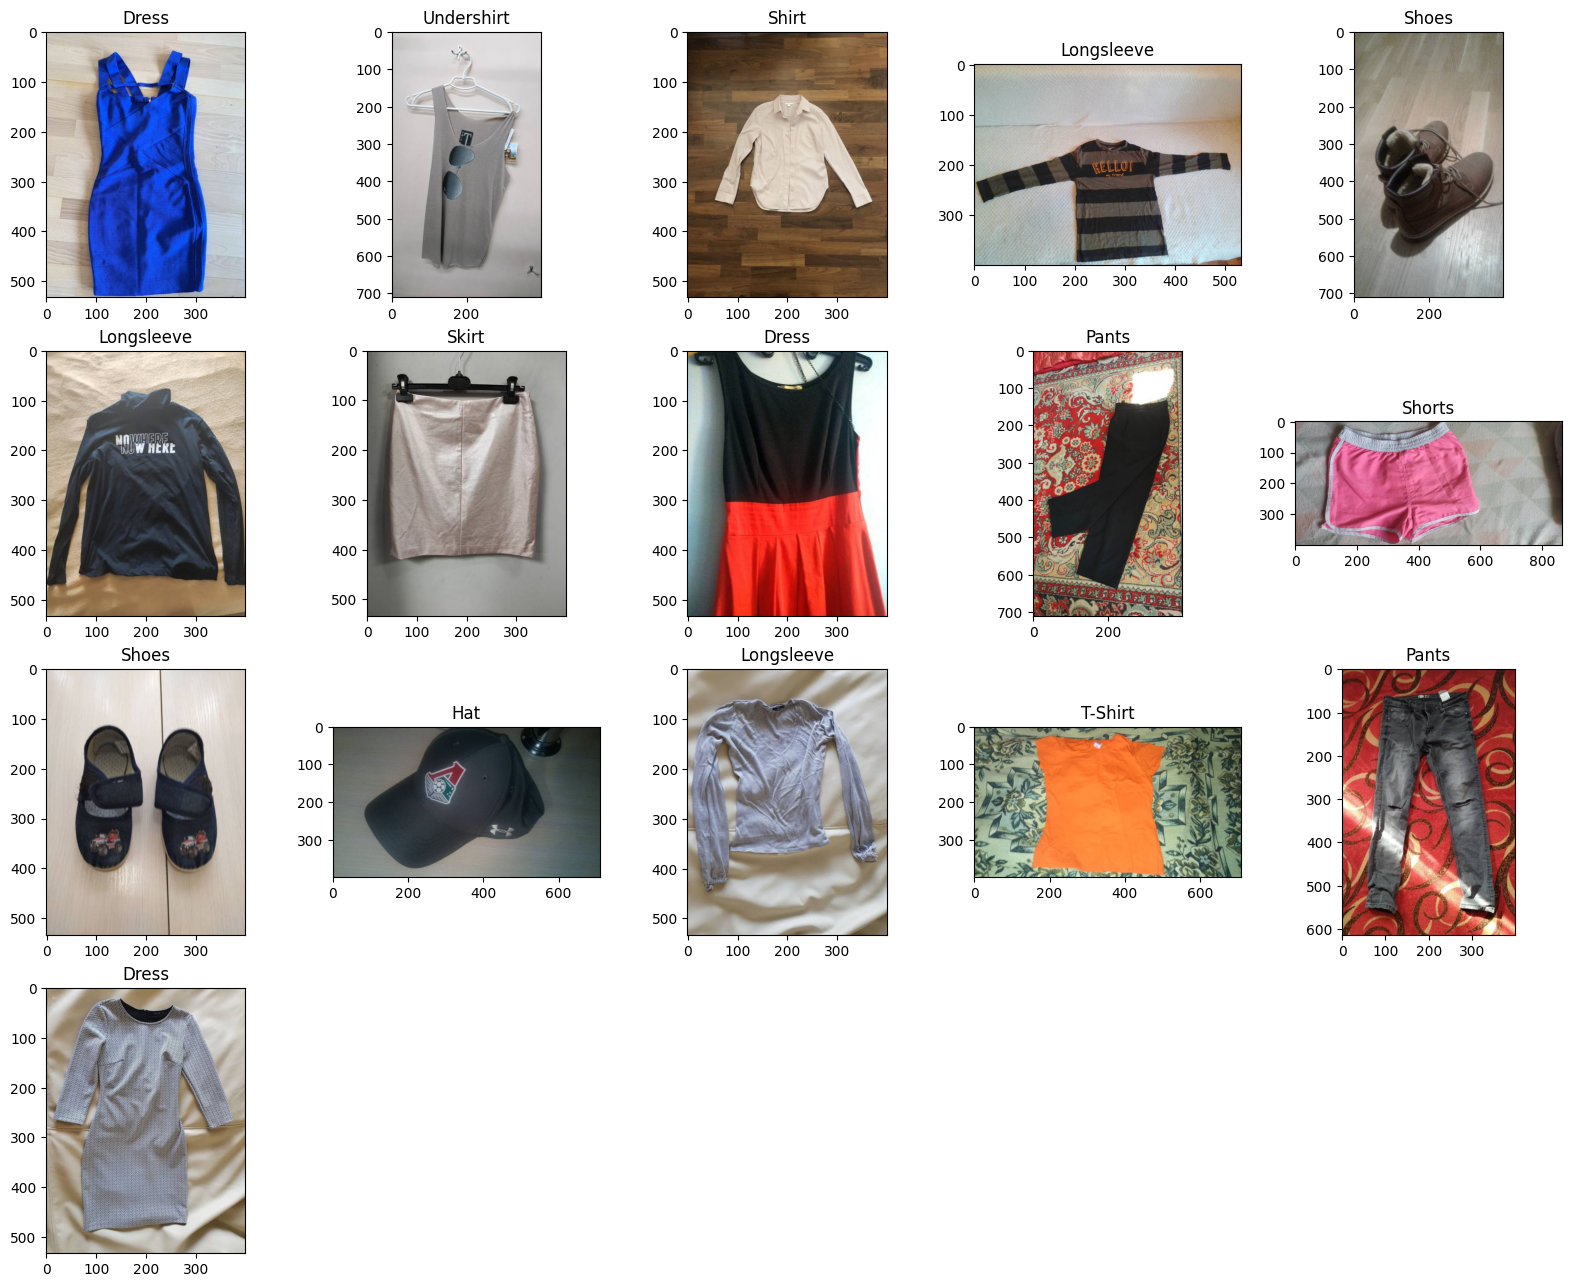

In [24]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(5, 5, i+1)
    show_random_training_image()
plt.show()


# **Data Augmentation**

In [25]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.3,
                                  horizontal_flip=True,
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels1,
    directory=dataset,
    x_col='image',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
)

Found 4076 validated image filenames belonging to 17 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning:

Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.



In [27]:
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=labels1,
    directory=dataset,
    x_col='image',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    subset='validation'
)

Found 1019 validated image filenames belonging to 17 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning:

Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.



## **Create ResNet model50**

In [28]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [29]:
pretrained_model = ResNet50(input_shape=(224, 224, 3),
                                include_top=False,
                                weights='imagenet')


In [30]:
for layer in pretrained_model.layers:
    layer.trainable = True

# # Freeze base layers
# for layer in base_model.layers:
#     layer.trainable = False

In [31]:
inputs = pretrained_model.input

x = pretrained_model.output
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64,name='Feature_extractor', activation='relu')(x)
outputs = tf.keras.layers.Dense(17, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)



# # Add new head
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu', name='Feature_extractor')(x)
# outputs = Dense(len(classes), activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=outputs)


In [32]:
from tensorflow.keras.optimizers import Adam, SGD
model.compile(Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
# # Compile model with label smoothing
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#     loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
#     metrics=['accuracy']
# )
# # Callbacks
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
#     ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
# ]

# # Train head
# history_head = model.fit(
#     train_generator,
#     epochs=15,
#     validation_data=validation_generator,
#     callbacks=callbacks
# )

# # Unfreeze some top layers for fine-tuning
# for layer in base_model.layers[-30:]:
#     layer.trainable = True

# # Recompile with lower learning rate
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
#     metrics=['accuracy']
# )

# # Fine-tune
# history_finetune = model.fit(
#     train_generator,
#     epochs=10,
#     validation_data=validation_generator,
#     callbacks=callbacks
# )

# print("Training complete.")


In [34]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 126,415,889 (482.24 MB)

 Trainable params: 126,362,769 (482.04 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
import tensorflow as tf
import datetime, os
es = tf.keras.callbacks.EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            #verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [36]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks= [es, learning_rate_reduction],
                    # steps_per_epoch=len(train_generator) //BATCH_SIZE,
                    # validation_steps=len(validation_generator) //BATCH_SIZE
                    )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.2785 - loss: 2.9060 - val_accuracy: 0.0196 - val_loss: 4.3015 - learning_rate: 1.0000e-04
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 98s 764ms/step - accuracy: 0.6115 - loss: 1.3443 - val_accuracy: 0.1462 - val_loss: 2.8643 - learning_rate: 1.0000e-04
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 96s 750ms/step - accuracy: 0.7123 - loss: 0.9472 - val_accuracy: 0.1521 - val_loss: 2.7476 - learning_rate: 1.0000e-04
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 742ms/step - accuracy: 0.7672 - loss: 0.7551 - val_accuracy: 0.2591 - val_loss: 2.7992 - learning_rate: 1.0000e-04
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 96s 753ms/step - accuracy: 0.8009 - loss: 0.6290 - val_accuracy: 0.3925 - val_loss: 2.2404 - learning_rate: 1.0000e-04
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 742ms/step - accuracy: 0.8416 - loss: 0.5432 - val_accuracy: 0.5564 - val_loss: 1.9774 - learning_rate: 1.0000e-04
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 738m

# **Model Performance**

In [37]:
# model.save('resnet50.h5')
save_path = '/content/drive/MyDrive/models/resnet501.h5'
model.save(save_path)

In [38]:
loss, accuracy = model.evaluate(validation_generator, verbose=2)


32/32 - 55s - 2s/step - accuracy: 0.7233 - loss: 1.4463


In [39]:
print(f"Model Loss is {loss:.2f} and Accuracy is {100*np.round(accuracy, 4)}%")


Model Loss is 1.45 and Accuracy is 72.33000000000001%


In [40]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

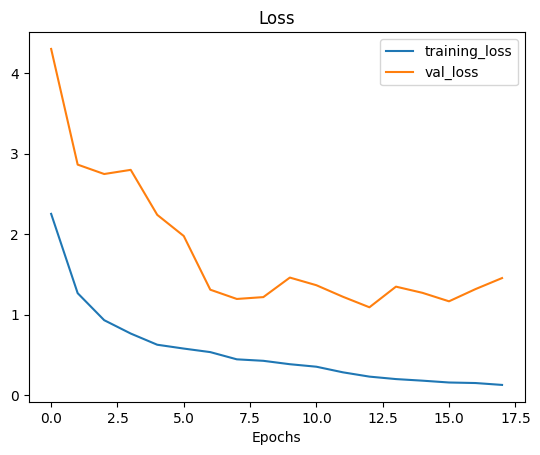

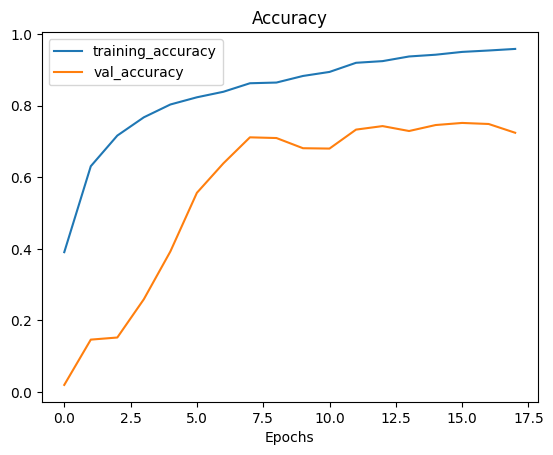

In [41]:
plot_loss_curves(history)
plt.show()

In [42]:
classes = list(train_generator.class_indices.keys())

In [43]:
def predict_val_image(index):
    predictions =  model.predict(val_images, verbose=0)[index]
    true_label = classes[val_labels[index].argmax()]
    predicted_label = classes[predictions.argmax()]

    if(true_label== predicted_label):
        color = 'green'
    else:
        color = 'red'

    plt.title(f"True : {true_label} Predicted: {predicted_label}", color=color)
    plt.imshow(val_images[index])
    plt.axis('off')
val_images, val_labels = next(validation_generator)
plt.figure(figsize=(20, 20))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    predict_val_image(i)


Output hidden; open in https://colab.research.google.com to view.

In [44]:
plt.show()

# **Prediction on test images which are not used for training and validation**

In [45]:
custom_dir = '/content/drive/MyDrive/XLA/xử_lý_ảnh/dataset/images_original'

In [46]:
custom_paths = []
for image in os.listdir(custom_dir):
        custom_paths.append(custom_dir+'/'+image)

In [47]:
def predict_random_image():
    path = random.choice(custom_paths)
    image = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    input_arr = input_arr.astype('float32') / 255.
    predictions = model.predict(input_arr, verbose=0)
    series = pd.Series(predictions[0], index=classes)
    predicted_classes = np.argsort(predictions)
    predictions.sort()
    plt.title(f"{classes[predicted_classes[0][-1]]} - {round(predictions[0][-1] * 100,2)}% \n{classes[predicted_classes[0][-2]]} - {round(predictions[0][-2] * 100,2)}% \n{classes[predicted_classes[0][-3]]} - {round(predictions[0][-2] * 100,3)}%")
    plt.imshow(image)
    plt.axis('off')

In [48]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    predict_random_image()

Output hidden; open in https://colab.research.google.com to view.

In [49]:
plt.show()